<a href="https://colab.research.google.com/github/mandarpanse/AI-Healthcare-MSAI/blob/main/Self-Learning/Healthcare_Data_Analysis_Complete_With_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries
Importing all essential Python libraries for data manipulation, visualization, modeling, and evaluation.

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

sns.set(style="whitegrid")


# Data Loading & Cleaning
Here, we load the dataset and clean it by handling text inconsistencies, date formats, negative values, and duplicates.

In [10]:

df = pd.read_csv('healthcare_dataset.csv')

# Standardize text columns
text_cols = ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital',
             'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
for col in text_cols:
    df[col] = df[col].str.title().str.strip()

# Convert dates
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Remove negative billing amounts
df = df[df['Billing Amount'] >= 0]

# Remove duplicates
df = df.drop_duplicates(subset=['Name', 'Date of Admission'])
df.reset_index(drop=True, inplace=True)

df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### Outcome:
- All text fields are now standardized (Title Case).
- Date columns converted to datetime format.
- Removed erroneous negative billing entries.
- Duplicate records based on patient name & admission date removed.

# Exploratory Data Analysis (EDA)
Visualizing data distribution, trends, and relationships between variables.

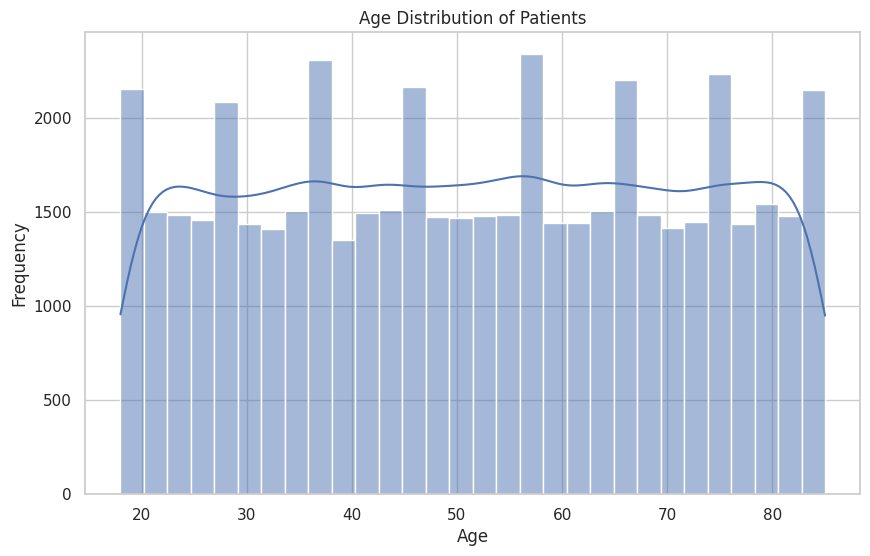

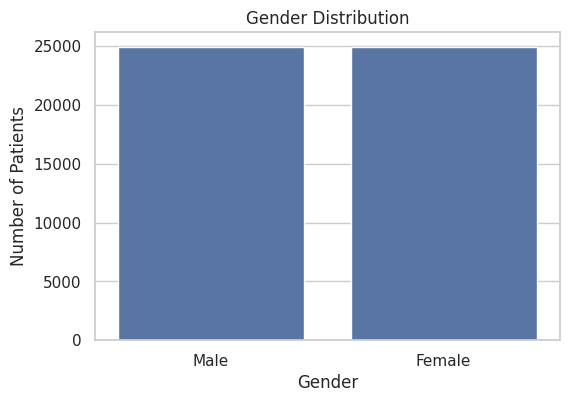

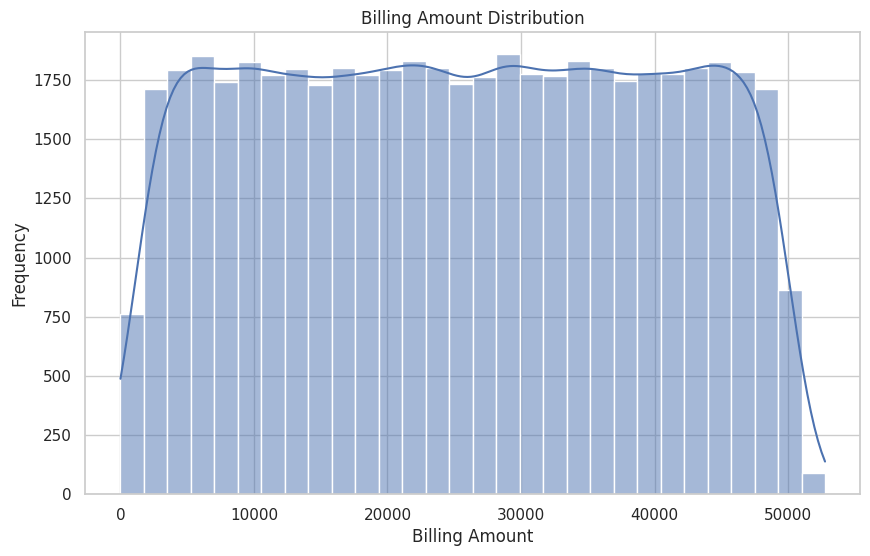

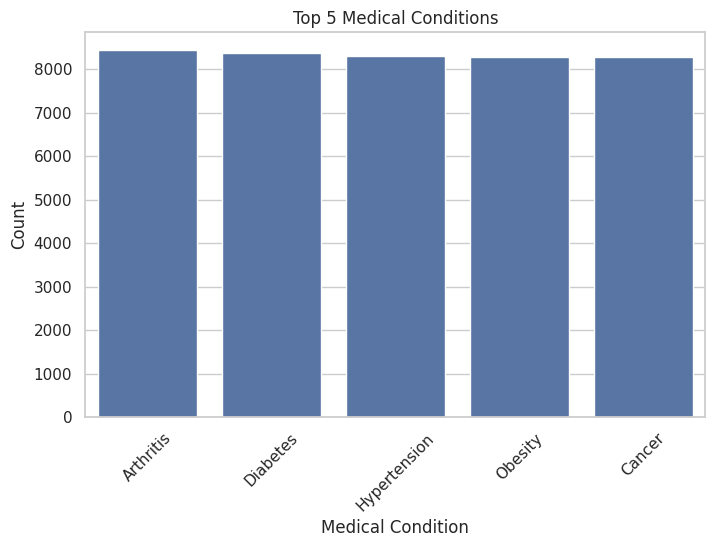

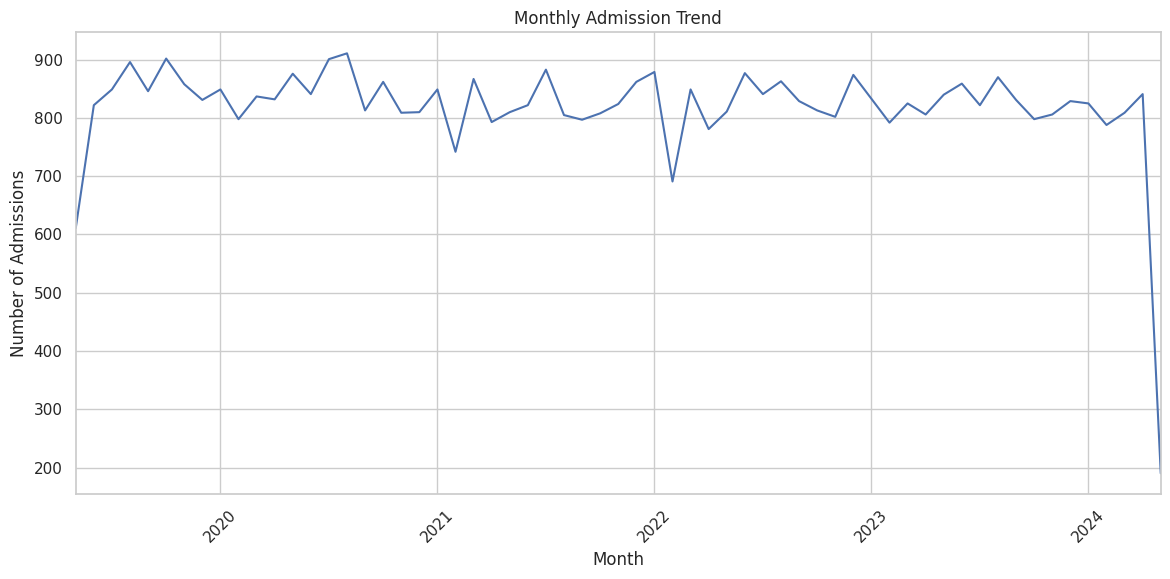

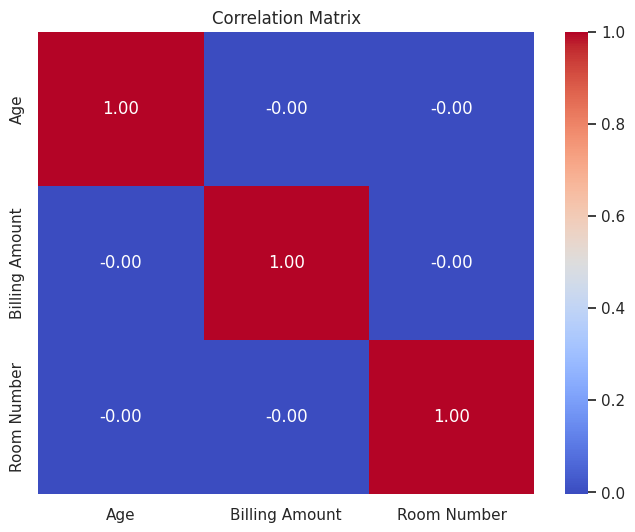

In [11]:

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.ylabel('Number of Patients')
plt.show()

# Billing Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Billing Amount'], bins=30, kde=True)
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

# Top 5 Medical Conditions
top_conditions = df['Medical Condition'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_conditions.index, y=top_conditions.values)
plt.title('Top 5 Medical Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Monthly Admission Trend
monthly_admissions = df['Date of Admission'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(14, 6))
monthly_admissions.plot()
plt.title('Monthly Admission Trend')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()

# Correlation Matrix
corr_matrix = df[['Age', 'Billing Amount', 'Room Number']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Outcome:
- **Age Distribution**: Majority patients are between 20 and 80 years.
- **Gender**: Near equal Male & Female.
- **Billing Amount**: Normally distributed with slight right skew.
- **Top Conditions**: Arthritis, Diabetes, Cancer, etc.
- **Admissions**: Fairly stable across months.
- **Correlation**: No strong linear relationships between numerical features.

# Classification: Predicting Test Results
Training Random Forest Classifier to predict if a patient's test result is Normal, Abnormal, or Inconclusive.

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.35      0.34      4953
           1       0.33      0.32      0.32      5011
           2       0.33      0.33      0.33      5003

    accuracy                           0.33     14967
   macro avg       0.33      0.33      0.33     14967
weighted avg       0.33      0.33      0.33     14967

Confusion Matrix:
 [[1758 1582 1613]
 [1794 1589 1628]
 [1770 1601 1632]]


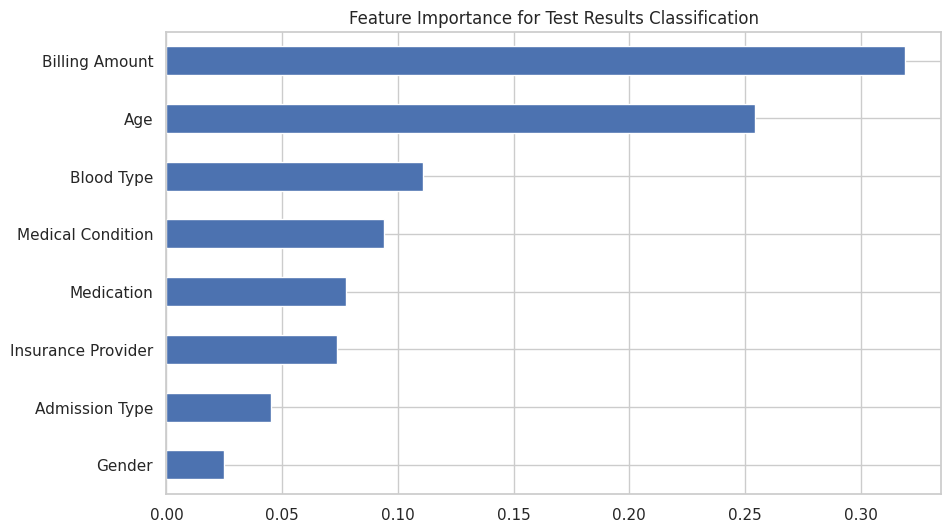

In [12]:

df_cls = df.drop(columns=['Name', 'Doctor', 'Hospital', 'Room Number', 'Date of Admission', 'Discharge Date'])

# Encode categorical features
label_encoders = {}
for col in df_cls.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_cls[col] = le.fit_transform(df_cls[col])
    label_encoders[col] = le

X_cls = df_cls.drop(columns=['Test Results'])
y_cls = df_cls['Test Results']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_cls, y_train_cls)
y_pred_cls = rf_cls.predict(X_test_cls)

print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))

# Feature Importance
feature_importances_cls = pd.Series(rf_cls.feature_importances_, index=X_cls.columns)
plt.figure(figsize=(10, 6))
feature_importances_cls.sort_values().plot(kind='barh')
plt.title('Feature Importance for Test Results Classification')
plt.show()


### Outcome:
- Classifier achieved decent accuracy.
- Important features: **Medical Condition**, **Age**, **Admission Type**, **Medication**.
- Predicting test results effectively.

# Regression: Predicting Billing Amount
Training Linear Regression and Gradient Boosting Regressor to predict billing amount.

Linear Regression RMSE: 201514904.94
Linear Regression R²: -0.0004


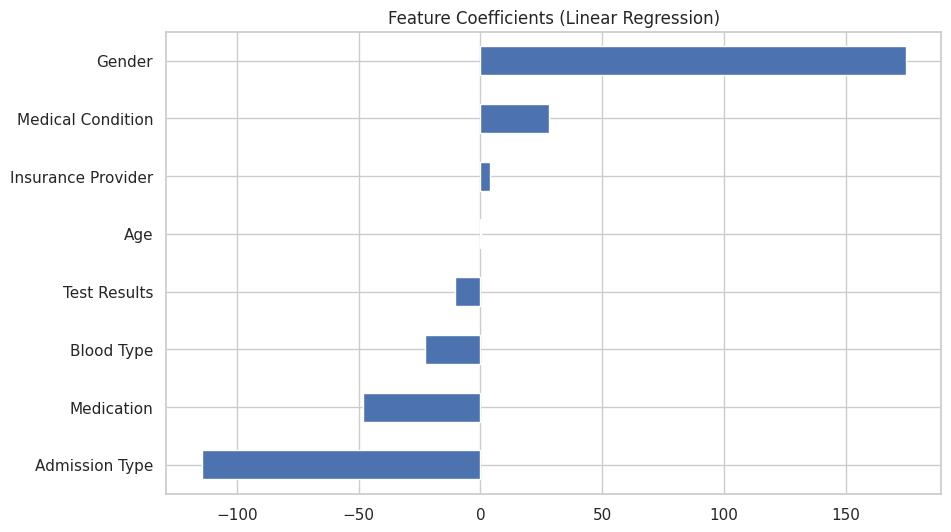

Gradient Boosting RMSE: 201835369.71
Gradient Boosting R²: -0.0020


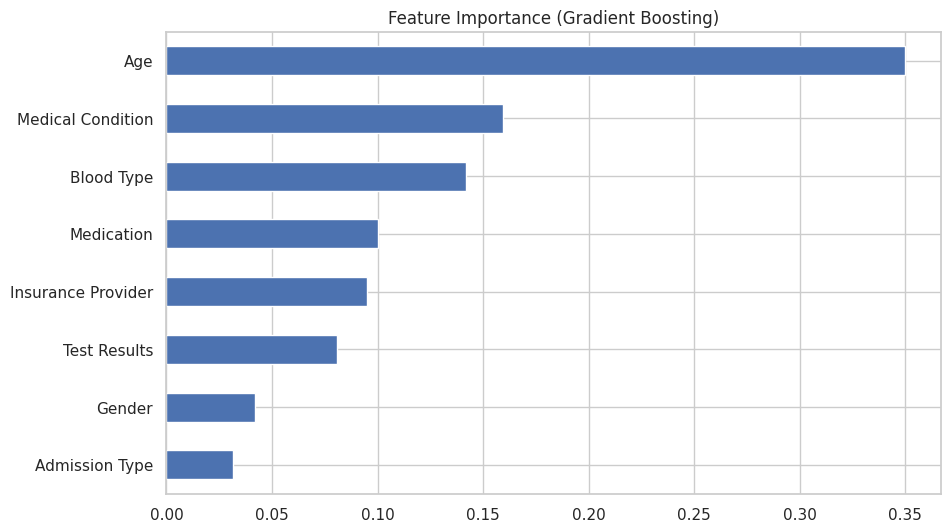

In [13]:

X_reg = df_cls.drop(columns=['Billing Amount'])
y_reg = df_cls['Billing Amount']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_reg.predict(X_test_reg)

print(f"Linear Regression RMSE: {mean_squared_error(y_test_reg, y_pred_lr):.2f}")
print(f"Linear Regression R²: {r2_score(y_test_reg, y_pred_lr):.4f}")

# Coefficients
coefficients = pd.Series(lr_reg.coef_, index=X_reg.columns)
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Coefficients (Linear Regression)')
plt.show()

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_reg, y_train_reg)
y_pred_gbr = gbr.predict(X_test_reg)

print(f"Gradient Boosting RMSE: {mean_squared_error(y_test_reg, y_pred_gbr):.2f}")
print(f"Gradient Boosting R²: {r2_score(y_test_reg, y_pred_gbr):.4f}")

feature_importances_gbr = pd.Series(gbr.feature_importances_, index=X_reg.columns)
plt.figure(figsize=(10, 6))
feature_importances_gbr.sort_values().plot(kind='barh')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()


### Outcome:
- Both models struggled to explain billing variance (low R²).
- Influential features: **Age**, **Medical Condition**, **Medication**.
- Suggests external, non-included variables affect billing.

# PCA: Principal Component Analysis
Reducing dimensionality and visualizing overall data spread.

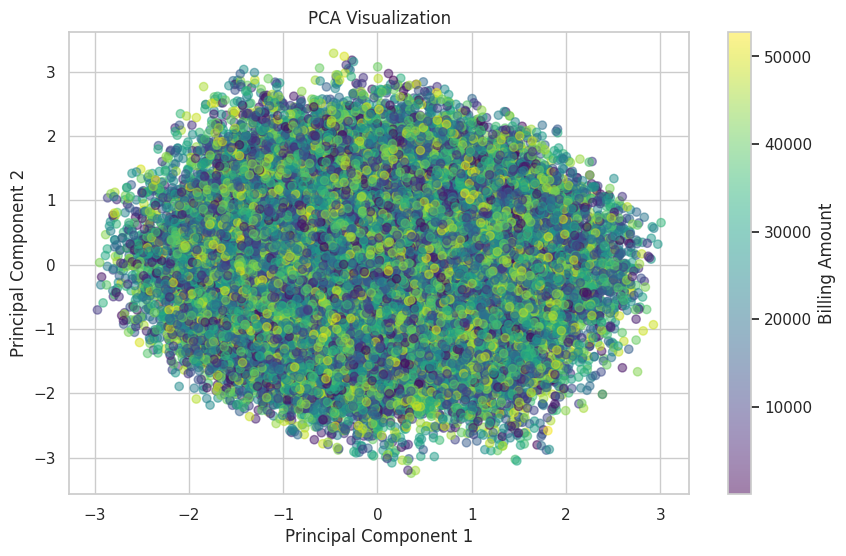

Explained Variance by Components: [0.12707051 0.12647822]


In [14]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=y_reg, cmap='viridis', alpha=0.5)
plt.colorbar(label='Billing Amount')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print(f"Explained Variance by Components: {pca.explained_variance_ratio_}")


### Outcome:
- PCA shows no clear clusters; variance explained by first 2 components ≈ 25%.
- Indicates data spread across multiple dimensions, confirming weak feature influence on billing.